# Кластеризация клиентов банка
Данные взяты с [Kaggle](https://www.kaggle.com/datasets/uciml/german-credit)

## Import libraries

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from functools import partial
from math import ceil

sns.set_style("whitegrid")

## Read data

- Age (numeric)
- Sex (text: male, female)
- Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
- Housing (text: own, rent, or free)
- Saving accounts (text - little, moderate, quite rich, rich)
- Checking account (text - little, moderate, quite rich, rich)
- Credit amount (numeric, in DM)
- Duration (numeric, in month)
- Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

In [11]:
df = pd.read_csv('german_credit_data.csv')
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV


## EDA
Дропнем ненужную первую колонку:

In [12]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


## Categorical variables
Поле Job сконвертируем в текст для лучшей интерпретаци в ходе EDA.

In [15]:
job_map = {
    0: 'unskilled and non-resident',
    1: 'unskilled and resident',
    2: 'skilled',
    3: 'highly skilled'
}
df['Job_cat'] = df['Job'].map(job_map)

Сконвертируем все категориальные признаки в category:

In [19]:
cat_vars = df.select_dtypes('object').columns
df[cat_vars] = df[cat_vars].astype('category')

Теперь можем визуализировать

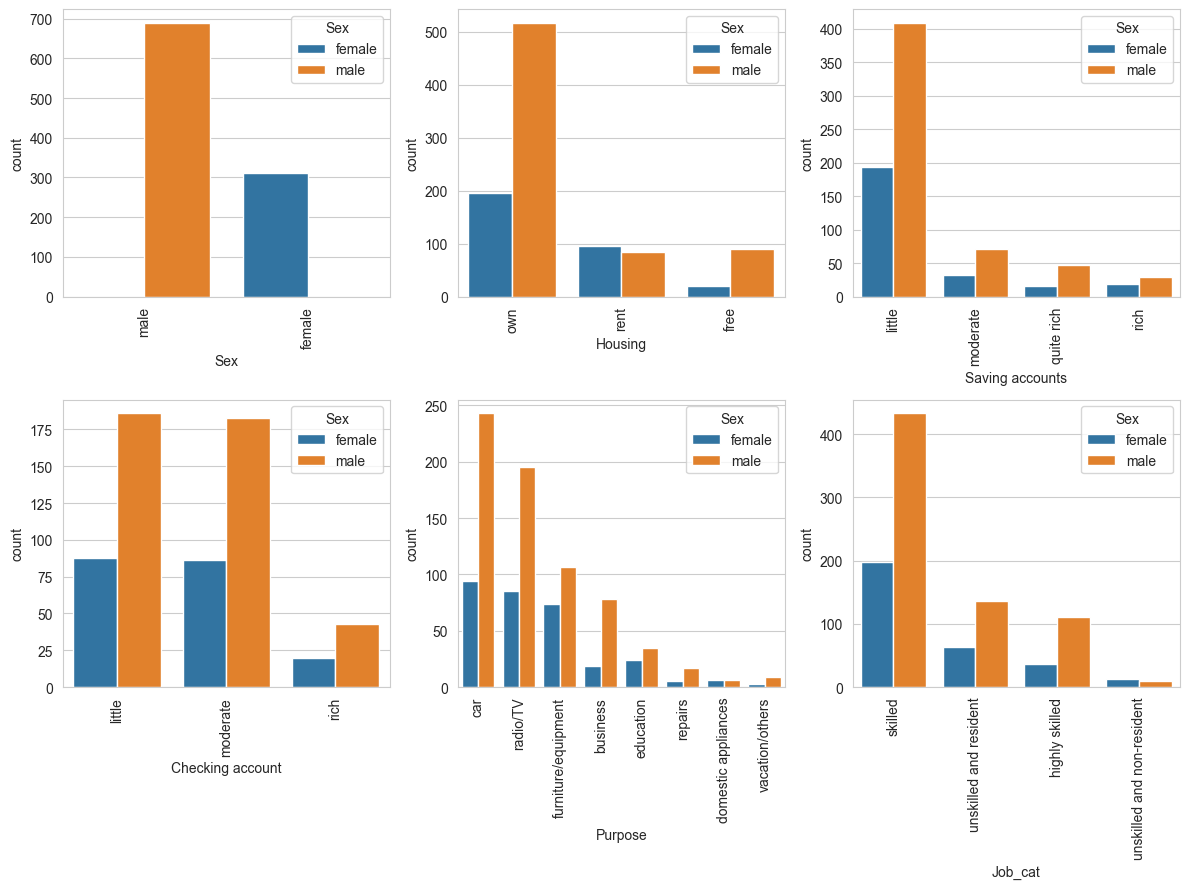

In [71]:
ncol = 3
nrow = ceil(len(cat_vars)/ncol)
fig, axes = plt.subplots(nrow, ncol)
fig.set_size_inches(ncol*4, nrow*4.5)
for ax, cat in zip(axes.flatten(), cat_vars):
    sns.countplot(data=df, x=cat, ax=ax, hue='Sex', order=df[cat].value_counts().index)
    ax.tick_params('x', labelrotation=90)
plt.tight_layout()
plt.show()

Стоит отметить, что датасет репрезентативен в разрезе пола, в каждой категории примерно такое же соотношение женщин и мужчин как во всем датасете.

## Numeric variables
Посмотрим на распределение числовых признаков

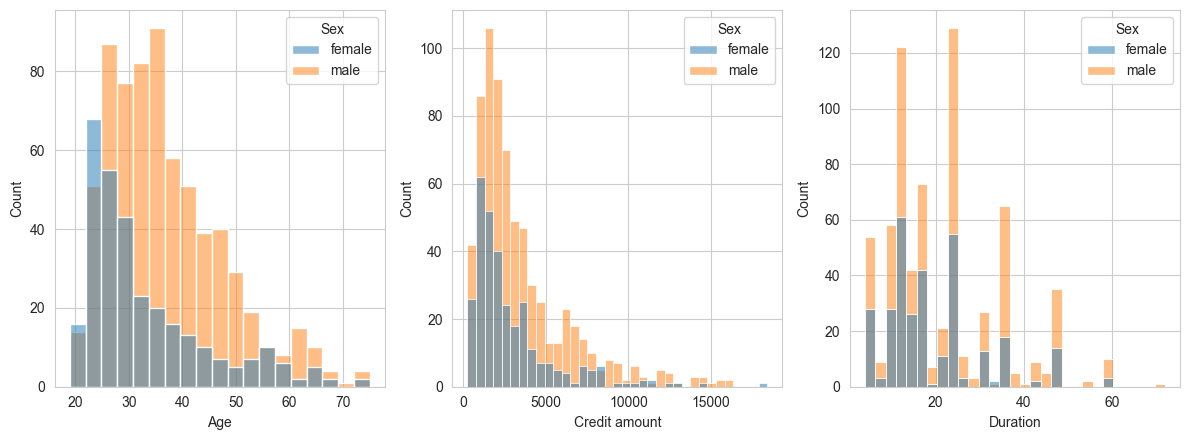

In [72]:
num_vars = df.select_dtypes(exclude='category').drop('Job', axis=1).columns
ncol = 3
nrow = ceil(len(num_vars)/ncol)
fig, axes = plt.subplots(nrow, ncol)
fig.set_size_inches(ncol*4, nrow*4.5)
for ax, num in zip(axes.flatten(), num_vars):
    sns.histplot(data=df, x=num, ax=ax, hue='Sex')
plt.tight_layout()
plt.show()

Распределение возраста и суммы кредита приблизительно нормальные со скосом вправо, а срок кредита отдаленное напоминает его.